In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sales = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_sales.csv")

In [26]:
sales["date"] = pd.to_datetime(sales["date"])

In [27]:
checking = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/Bookstore Checking Balanced Dataset.csv")
checking.head()

,date,description,deposit,withdrawal,account_id,net_change,rolling_balance
0,2019-01-01,Sales sweep deposit,4726.44,0.00,CHK-001,4726.44,79726.44
1,2019-01-01,Store & warehouse rent,0.00,18500.00,CHK-001,-18500.00,61226.44
2,2019-01-02,Misc operating expense,0.00,486.05,CHK-001,-486.05,60740.39
3,2019-01-03,Payroll,0.00,11758.92,CHK-001,-11758.92,48981.47
4,2019-01-04,Sales sweep deposit,4102.04,0.00,CHK-001,4102.04,53083.51


In [28]:
checking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1258 non-null   object 
 1   description      1258 non-null   object 
 2   deposit          1258 non-null   float64
 3   withdrawal       1258 non-null   float64
 4   account_id       1258 non-null   object 
 5   net_change       1258 non-null   float64
 6   rolling_balance  1258 non-null   float64
dtypes: float64(4), object(3)
memory usage: 68.9+ KB


In [29]:
checking["date"] = pd.to_datetime(checking["date"])

In [30]:
checking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1258 non-null   datetime64[ns]
 1   description      1258 non-null   object        
 2   deposit          1258 non-null   float64       
 3   withdrawal       1258 non-null   float64       
 4   account_id       1258 non-null   object        
 5   net_change       1258 non-null   float64       
 6   rolling_balance  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 68.9+ KB


In [31]:
checking.describe()

,date,deposit,withdrawal,net_change,rolling_balance
count,1258,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2022-01-03 09:41:29.666136832,2540.951240,4138.847417,-1597.896176,-9.133783e+05
min,2019-01-01 00:00:00,0.000000,0.000000,-21830.000000,-1.943239e+06
25%,2020-07-11 18:00:00,0.000000,0.000000,-9393.930000,-1.408291e+06
50%,2021-12-30 12:00:00,3427.835000,0.000000,3427.835000,-8.907635e+05
75%,2023-07-02 06:00:00,4634.125000,9393.930000,4634.125000,-4.249267e+05
max,2024-12-31 00:00:00,7149.430000,21830.000000,7149.430000,7.972644e+04
std,NaN,2342.182986,6343.171272,8171.388789,5.823545e+05


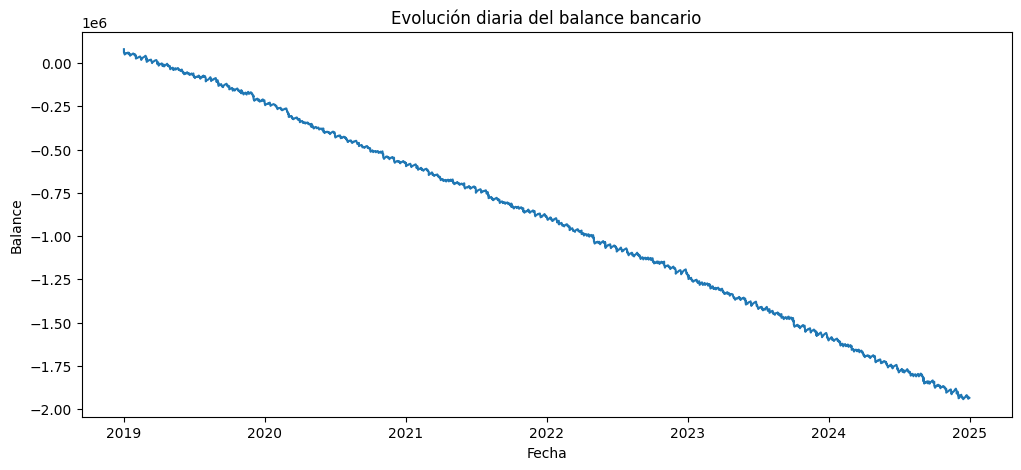

In [32]:
checking_sorted = checking.sort_values("date")

plt.figure(figsize=(12,5))
plt.plot(checking_sorted["date"], checking_sorted["rolling_balance"])
plt.title("Evolución diaria del balance bancario")
plt.xlabel("Fecha")
plt.ylabel("Balance")
plt.show()

In [33]:
checking_monthly = (
    checking
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(
        net_change=("net_change", "sum"),
        balance=("rolling_balance", "last")
    )
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_14692\2434725434.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


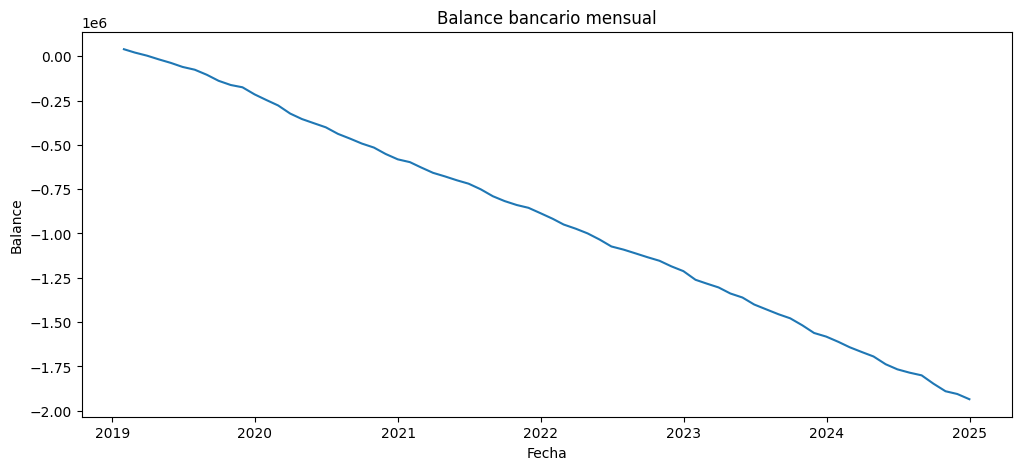

In [34]:
plt.figure(figsize=(12,5))
plt.plot(checking_monthly["date"], checking_monthly["balance"])
plt.title("Balance bancario mensual")
plt.xlabel("Fecha")
plt.ylabel("Balance")
plt.show()

El análisis del balance bancario revela una tendencia negativa sostenida a lo largo de todo el periodo analizado. A pesar del crecimiento progresivo de las ventas observado en años posteriores a la pandemia, el balance de caja continúa deteriorándose, lo que indica un desequilibrio estructural entre ingresos y gastos.

#### NOTA

La cuenta bancaria analizada no refleja directamente los ingresos por ventas, sino que actúa como una cuenta operativa destinada a cubrir los gastos diarios del negocio. Por este motivo, su evolución no sigue el patrón de las ventas y muestra una tendencia descendente asociada al consumo de liquidez.

In [35]:
# sales mensual (si no lo tienes ya)
sales_monthly = (
    sales
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(net_revenue=("net_revenue", "sum"))
    .reset_index()
)

# merge
financial = pd.merge(
    sales_monthly,
    checking_monthly,
    on="date",
    how="inner"
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_14692\2952394118.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


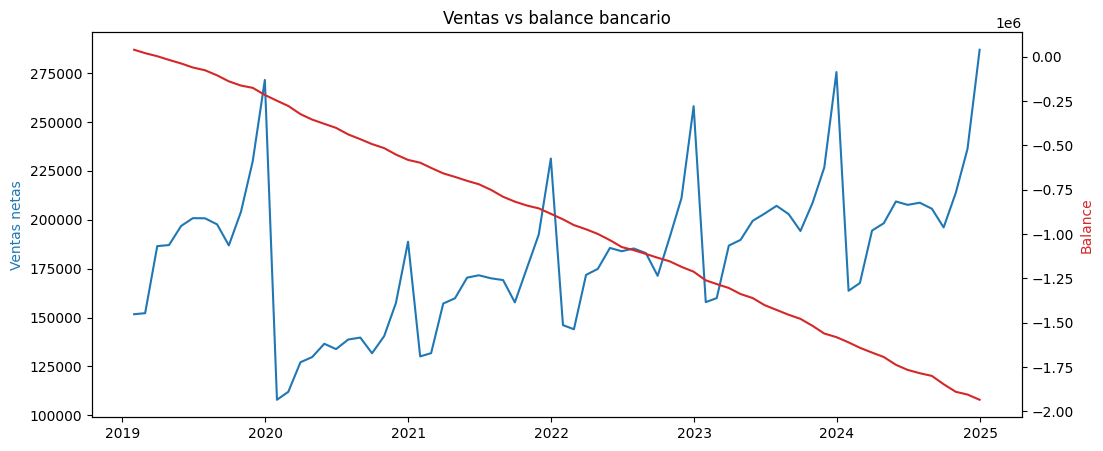

In [36]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(financial["date"], financial["net_revenue"], color="tab:blue")
ax1.set_ylabel("Ventas netas", color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(financial["date"], financial["balance"], color="tab:red")
ax2.set_ylabel("Balance", color="tab:red")

plt.title("Ventas vs balance bancario")
plt.show()